<a href="https://colab.research.google.com/github/saahilahujaa/Topic-Modelling-on-BBC-News-Articles/blob/main/Topic_Modelling_on_BBC_News_Articles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Topic Modelling on BBC News Articles**
***
[BBC](https://www.bbc.com/) stands for British Broadcasting Corporation.

It is an operational business division of the British Broadcasting Corporation (BBC) responsible for the gathering and broadcasting of news and current affairs in the UK and around the world. The department is the world's largest broadcast news organisation and generates about 120 hours of radio and television output each day, as well as online news coverage.

The service maintains 50 foreign news bureaus with more than 250 correspondents around the world.

BBC News Online is the BBC's news website. It is one of the most popular news websites in the UK, reaching over a quarter of the UK's internet users, and worldwide, with around 14 million global readers every month. 

The website contains international news coverage as well as articles based on entertainment, sport, science, and political news.



## **Objective** 

In this project the task is to identify major themes/topics across a collection of BBC news articles. 

## **Importing Neccessary Modules**

Now in this section we'll import all the neccessary libraries and packages we'll require to develop the required model.

In [1]:
# importing os module
import os

# importing CountVectorizer for feature extraction
from sklearn.feature_extraction.text import CountVectorizer

# Importing data manipulation libraries
import numpy as np
import pandas as pd

# importing tqdm and display modules for progress meters/bars
from IPython.display import display
from tqdm import tqdm

# importing wordcloud to represent topics wordcloud
from wordcloud import WordCloud

# Model selection modules
from sklearn.model_selection import GridSearchCV

# Importing Counter
from collections import Counter

# import ast(abstract syntax tree)
import ast

# importing data visualization modules
import matplotlib.pyplot as plt
import seaborn as sns

# importing mlab for implementing MATLAB functions
import matplotlib.mlab as mlab

# importing statistics module
import scipy.stats as stats

# importing TSNE for data exploration and visualizing high-dimensional data
from sklearn.manifold import TSNE

# importing decomposition modules
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation

# importing Natural Language Toolkit and other NLP modules
import nltk
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob, Word

# importing countVectorizer for text vectorization
from sklearn.feature_extraction.text import CountVectorizer

# Importing warnings library. The warnings module handles warnings in Python.
import warnings
warnings.filterwarnings('ignore')

## **Data Gathering and Discovery (EDA)**

Now we'll gather the data files and perform some basic operations to understand the data and how we can process it to improve the model performance. We will also apply some basic EDA to better understand the data.

In [2]:
# Mounting the Google Drive to access data.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Note:-** The dataset in this case isn't collective, its been stored in form of numerous text files sub-categorized in 5 different domains. Hence, for loading the data we'll visit all text files individually and copy all articles to a dataframe along with their category.

In [4]:
# The variable "directory" holds the address of text files stored in drive
directory = '/content/drive/MyDrive/Alma Better/Capstone Projects/Capstone Project 4 - Topic Modeling on News Articles/bbc/'

# All 5 sub-categories provided
subdirs = ['business', 'entertainment', 'politics', 'sport', 'tech']

# Create dataframe for gathering the articles
bbc = pd.DataFrame()
 
# Iterate over sub-directories to access the text files
for subdir in subdirs:

  # address to the subdirectory
  dir = directory + '/' + subdir

  # Iterate over all the text files present in a sub-directory
  for filename in os.listdir(dir):
    
    # Get file address
    filepath = os.path.join(dir, filename)

    # Traversing over text files and storing the articles into the dataframe
    try:
      data = open(filepath,'r').read()

      # escape characters to be ignored in the text
      escape = ['\n']
      
      # removing escape characters from text
      for elem in escape:
        data = data.replace(elem, ' ')
      
      # Storing article to the dataframe
      dict1 = {'Filename': filename.split('.')[0], 'Contents': data.lower(), 'Category':subdir}
      bbc = bbc.append(dict1, ignore_index=True, verify_integrity = True)

    # Ignore exception, if any
    except:
      pass    

**The dataset contains a set of news articles for each major segment consisting of business, entertainment, politics, sports and technology.**
There are over 2000 news article available in these categories.

Note:- There was a particular file in this dataset which was formatted differently from the rest of the files, hence while reading the data, the text formatting was throwing an exception. For such case we have neglected the file altogether, since the case was relevant to only a single file. 

In [5]:
# Display dataframe
bbc

,Filename,Contents,Category
0,021,rank 'set to sell off film unit' leisure grou...,business
1,004,high fuel prices hit ba's profits british air...,business
2,007,jobs growth still slow in the us the us creat...,business
3,009,ethiopia's crop production up 24% ethiopia pr...,business
4,023,mixed signals from french economy the french ...,business
...,...,...,...
2219,401,losing yourself in online gaming online role ...,tech
2220,366,rolling out next generation's net the body th...,tech
2221,400,us cyber security chief resigns the man makin...,tech
2222,356,hitachi unveils 'fastest robot' japanese elec...,tech


**The dataset consists of the following attributes:**

●	Index: Entry index.

●	FileName: Destination File name/number.

●	Contents: Complete transcript of a article, this contains all the textual data present in the destination file for a particular entry.

●	Category: Theme/domain of a article.


In [6]:
# Size of dataset
bbc.shape

(2224, 3)

Now, lets check if a particular article is being stored more than once into the dataframe. Having duplicates in our data would cause inconsistencies in results.

In [7]:
# Checking for duplicate rows
bbc[bbc.duplicated(subset = "Contents")]

,Filename,Contents,Category
217,253,jobs growth still slow in the us the us creat...,business
247,240,economy 'strong' in election year uk business...,business
287,371,singapore growth at 8.1% in 2004 singapore's ...,business
290,333,troubled marsh under sec scrutiny the us stoc...,business
370,356,s korea spending boost to economy south korea...,business
...,...,...,...
2213,324,apple attacked over sources row civil liberti...,tech
2214,332,apple ipod family expands market apple has ex...,tech
2215,373,software watching while you work software tha...,tech
2217,339,hotspot users gain free net calls people usin...,tech


We can see there are 99 duplicate rows, it resembles that these articles are present more than once, we need to drop such rows before we proceed further with the model development.


In [8]:
# Dropping duplicate entries
bbc = bbc.drop_duplicates(subset=['Contents'], keep='first')
bbc

,Filename,Contents,Category
0,021,rank 'set to sell off film unit' leisure grou...,business
1,004,high fuel prices hit ba's profits british air...,business
2,007,jobs growth still slow in the us the us creat...,business
3,009,ethiopia's crop production up 24% ethiopia pr...,business
4,023,mixed signals from french economy the french ...,business
...,...,...,...
2218,349,broadband set to revolutionise tv bt is start...,tech
2219,401,losing yourself in online gaming online role ...,tech
2220,366,rolling out next generation's net the body th...,tech
2221,400,us cyber security chief resigns the man makin...,tech


In [9]:
# Size of dataset after removing duplicates
bbc.shape

(2125, 3)

### **Categories**

Now, lets see how many articles are there across all 5 categories.

In [10]:
# Grouping rows based on categories and counting number of entries
df = bbc.groupby(['Category'])['Category'].count()
df

Category
business         503
entertainment    369
politics         403
sport            503
tech             347
Name: Category, dtype: int64

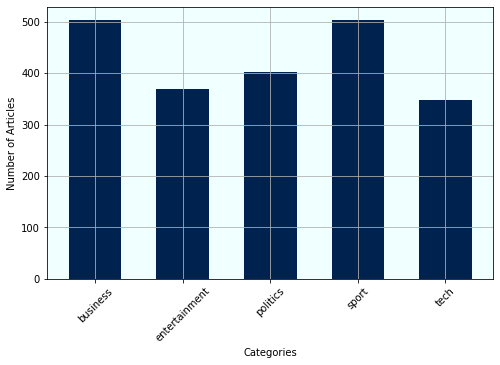

In [11]:
# Plotting a bar graph to represent all categories and number of articles in them 
df.plot(x = "Category", kind = "bar", 
        figsize=(8,5), grid = True,
        xlabel = "Categories",
        ylabel = "Number of Articles",
        colormap= "cividis", width = 0.6, 
        rot = 45).patch.set_facecolor('#f0ffff')

We can see that **Business** and **Sports** category have the highest number of articles, while for **Tech** category the number is quite low. Number of articles will play a major role in determining the topics in them. Larger the number of articles for a category, higher will be the result satisfaction for the model.  

### **Contents**

Reindexing the data and extracting just the contents of the article i.e, the complete transcript of the article.

In [12]:
# Reindexing the data
reindexed_data = bbc.reset_index()

# Extracting contents of all articles
reindexed_data = reindexed_data["Contents"]

# Display 
reindexed_data

0       rank 'set to sell off film unit'  leisure grou...
1       high fuel prices hit ba's profits  british air...
2       jobs growth still slow in the us  the us creat...
3       ethiopia's crop production up 24%  ethiopia pr...
4       mixed signals from french economy  the french ...
                              ...                        
2120    broadband set to revolutionise tv  bt is start...
2121    losing yourself in online gaming  online role ...
2122    rolling out next generation's net  the body th...
2123    us cyber security chief resigns  the man makin...
2124    hitachi unveils 'fastest robot'  japanese elec...
Name: Contents, Length: 2125, dtype: object

As we can see the above dataset has got the complete set of articles, now we can use this dataset to count the top words with highest frequencies using **CountVectorizer**.

#### **CountVectorizer (Top Words)**

In order to use textual data for predictive modeling, the text must be parsed to remove certain words – this process is called **Tokenization**. 

These words then need to be encoded as integers, or floating-point values, such that they can be used as inputs in machine learning algorithms. This process is called **Feature Extraction (or Vectorization)**.

Scikit-learn’s **CountVectorizer** is used to convert a collection of text documents to a vector of term/token counts. It also enables the ​pre-processing of text data prior to generating the vector representation. This functionality makes it a highly flexible feature representation module for text.

CountVectorizer creates a matrix in which each unique word is represented by a column of the matrix, and each text sample from the document is a row in the matrix. The value of each cell is nothing but the count of the word in that particular text sample.

*Now that we know what CountVectorizer is, its time we implement it to gather the top-most occuring words in out dataset.*

In [13]:
# Function to extract top n words with highest frequency
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    The function returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample as inputs
    '''
    # encoding the document using countvectorizer object
    vectorized_content = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_content, axis=0)

    # extracting specifics for words
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)

    # creating a vector matrix for words
    word_vectors = np.zeros((n_top_words, vectorized_content.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    # display Vector matrix
    print(word_vectors)

    # collect the words
    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

**Removing Stopwords using NLTK (Natural Language Toolkit)**

**Stop Words**: A stop word is a commonly used word (such as “the”, “a”, “an”, “in”). Since these words occur a lot, a search engine has to be programmed to ignore them. We can easily remove them by storing a list of words that we consider to be stop words. 

**NLTK**(Natural Language Toolkit) in python has a list of stopwords stored in 16 different languages. Hence we'll use it to extract our data without all such words. 

In [14]:
# dowloading nltk stopwords module
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

We know that all of our articles are in english language, hence we'll only require stopwords in english.

In [15]:
# extracting all stopwords for english language
stpwrd = nltk.corpus.stopwords.words('english')

# list of stopwords in english language
stpwrd

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

**Now lets implement our countvectorizer to extract top words with highest frequencies.**

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


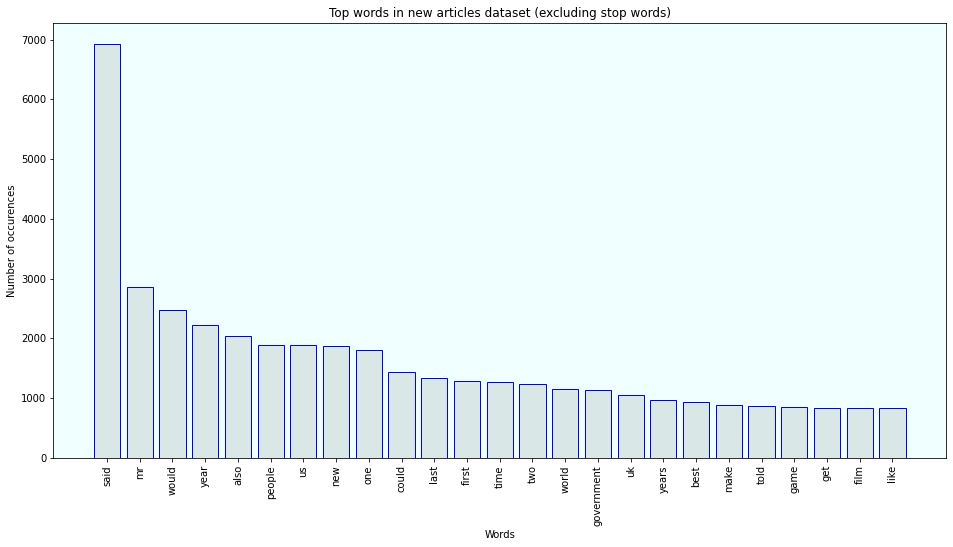

In [17]:
# creating vectorizer object
count_vectorizer = CountVectorizer(stop_words=stpwrd)

# calling the function to get words and their counts
words, word_values = get_top_n_words(n_top_words=25,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=reindexed_data)

# display top 25 words using bar plot
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values, color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue')
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation='vertical')
ax.set_title('Top words in new articles dataset (excluding stop words)')
ax.set_xlabel('Words')
ax.set_ylabel('Number of occurences')
ax.patch.set_facecolor('#f0ffff')
plt.show()

**Observations:** 

We can see some commonly used words like "said", "mr", "would" etc, are on top, which makes sense because no matter what the subject of a article is, these words help build up a sentence and hence the excessive use is inevitable. 

However, we can also find a few words relevant to the categories of our articles. For example, '**UK**' and '**US**'(since we converted all words to lower case, 'us' represents US too) both are country names which could reflect to any of the categories. Also words like '**government**' could reflect in articles related to Politics, Business, Tech etc.

The words like '**film**' and '**game**' sounds relevant to the entertainment category.

## **Stemming/Lemmatizing the data** (Experimental)

**Stemming** is the process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words known as a lemma. Stemming is important in natural language understanding (NLU) and natural language processing (NLP).

**Lemmatization:** This algorithm collects all inflected forms of a word in order to break them down to their root dictionary form or lemma. Words are broken down into a part of speech (the categories of word types) by way of the rules of grammar.

In [18]:
# contents of articles
reindexed_data

0       rank 'set to sell off film unit'  leisure grou...
1       high fuel prices hit ba's profits  british air...
2       jobs growth still slow in the us  the us creat...
3       ethiopia's crop production up 24%  ethiopia pr...
4       mixed signals from french economy  the french ...
                              ...                        
2120    broadband set to revolutionise tv  bt is start...
2121    losing yourself in online gaming  online role ...
2122    rolling out next generation's net  the body th...
2123    us cyber security chief resigns  the man makin...
2124    hitachi unveils 'fastest robot'  japanese elec...
Name: Contents, Length: 2125, dtype: object

In [19]:
# downloading wordNet lemmatizer
nltk.download(['wordnet','omw-1.4'])
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [21]:
# lemmatizing an article to see what wordnet returns
for rows in reindexed_data:
 print(rows)
 test = [lemmatizer.lemmatize(words) for words in rows.split(' ')]
 print(test)
 break

rank 'set to sell off film unit'  leisure group rank could unveil plans to demerge its film services unit and sell its media business, reports claim.  rank, formerly famous for the carry on series, will expose the shake-up at the announcement of its results on friday, the sunday telegraph reported. advisors goldman sachs are understood to have valued its demerged deluxe film unit at £300m, the report added. speculation of a possible shake-up has mounted since rank announced a study into a possible demerger in september. since mike smith's appointment as chief executive in 1999, the group has focused on fewer businesses and embarked on a major cost-cutting programme which has seen it dispose of a number of businesses, including the odeon cinema chain and the pinewood studios. the move left the group with three core divisions: gaming, hard rock and deluxe films, which provides technical services to hollywood studios.  rank now aims to concentrate on its gaming, bars and hotels business, 

As we can see the lemmatizer seems to be working fine, the words are segregated into a list. But the issue with this is for some words the lemmatizer returned ambiguous results, for example the first line says "A US government", here the lemmatizer reduced the text "US" to just "u". This takes away the whole meaning of that word.

**Now, lets try the lemmatization using Snowball Lemmatizer.**

In [22]:
# making a lemmatizer object
sno = nltk.stem.SnowballStemmer('english')

In [23]:
# lemmatizing an article to see what snowball lemmatizer returns
for rows in reindexed_data:
 print(rows)
 test = [sno.stem(words) for words in rows.split(' ')]
 print(test)
 break

rank 'set to sell off film unit'  leisure group rank could unveil plans to demerge its film services unit and sell its media business, reports claim.  rank, formerly famous for the carry on series, will expose the shake-up at the announcement of its results on friday, the sunday telegraph reported. advisors goldman sachs are understood to have valued its demerged deluxe film unit at £300m, the report added. speculation of a possible shake-up has mounted since rank announced a study into a possible demerger in september. since mike smith's appointment as chief executive in 1999, the group has focused on fewer businesses and embarked on a major cost-cutting programme which has seen it dispose of a number of businesses, including the odeon cinema chain and the pinewood studios. the move left the group with three core divisions: gaming, hard rock and deluxe films, which provides technical services to hollywood studios.  rank now aims to concentrate on its gaming, bars and hotels business, 

Again the lemmatizer does its job and we got the list of words but as we can see some words lost their meaning completely. For example, "government" is returned as "govern", this is acceptable to some extent but we also have words like 'accus' and 'countri' derived from accusing and companies respectively. These words do not make any sense at all. This lemmatizer is much more aggresive and hence we encounter more words that lost their meaning. 

**Now lets use TextBlob for the same.**

In [24]:
# Lemmatizing using textblob
for rows in reindexed_data:
 print(rows)
 test = [Word(words).lemmatize() for words in rows.split(' ')]
 print(test)
 break

rank 'set to sell off film unit'  leisure group rank could unveil plans to demerge its film services unit and sell its media business, reports claim.  rank, formerly famous for the carry on series, will expose the shake-up at the announcement of its results on friday, the sunday telegraph reported. advisors goldman sachs are understood to have valued its demerged deluxe film unit at £300m, the report added. speculation of a possible shake-up has mounted since rank announced a study into a possible demerger in september. since mike smith's appointment as chief executive in 1999, the group has focused on fewer businesses and embarked on a major cost-cutting programme which has seen it dispose of a number of businesses, including the odeon cinema chain and the pinewood studios. the move left the group with three core divisions: gaming, hard rock and deluxe films, which provides technical services to hollywood studios.  rank now aims to concentrate on its gaming, bars and hotels business, 

Here also we can see similar problems as we see in other lemmatizers, most words lost their meaning. The results are mostly similar to that of wordnet lemmatizer.

## **Feature Extraction (Vectorization)**

Vectorization is jargon for a classic approach of converting input data from its raw format (i.e. text ) into vectors of real numbers which is the format that ML models support.

The idea is to get some distinct features out of the text for the model to train on, by converting text to numerical vectors.

In [25]:
# creating a countvectorizer object
count_vectorizer = CountVectorizer(stop_words = stpwrd, max_features = 4000)

# text before vectorization 
text_sample = reindexed_data
print('Content before vectorization: {}'.format(text_sample[123]))

# encode the textual content
document_term_matrix = count_vectorizer.fit_transform(text_sample)

# text after vectorization
print('Content after vectorization: \n{}'.format(document_term_matrix[123]))

Content before vectorization: india and russia in energy talks  india and russia are to work together in a series of energy deals, part of a pact which could see india invest up to $20bn in oil and gas projects.  on the agenda are oil and gas extraction as well as transportation deals, to be led by russian energy giant gazprom and india's ongc. the indian firm is also expected to hold talks on tuesday about buying a stake in assets once owned by yukos. it is reported to be keen on buying a 15% stake in oil unit yuganskneftegas. the former yukos subsidiary was controversially sold off last year and eventually acquired by state-owned energy giant rosneft.  russian media reported that india and russia signed a memorandum of understanding on energy co-operation on tuesday during a meeting between oil and natural gas corporation chairman subir raha, gazprom chairman aleksey miller and india's petroleum minister mani shankar aiyar.  the agreement is likely to see the two companies develop re

We can see that the text was succesfully converted into a vectorized numeric form. The countvectorizer works as intended, we can now move forward to implement the ML model. 

## **Model Development**

Now that all the necessary preprocessing is done, we'll implement the ML model for topic modeling on the BBC news articles. Here we have used the LDA algorithm for the purpose. Let’s discuss more about the algorithm and its specifics.

### **Latent Dirichlet Allocation (LDA)**

Latent Dirichlet Allocation (LDA) is one of most popular topic modeling technique to extract topics from a given corpus. The term latent conveys something that exists but is not yet developed. In other words, latent means hidden or concealed. The Dirichlet model describes the pattern of the words that are repeating together, occurring frequently, and these words are similar to each other.

And this stochastic process uses Bayesian inferences for explaining “the prior knowledge about the distribution of random variables”. In the case of topic modeling, the process helps in estimating what are the chances of the words, which are spread over the document, will occur again? This enables the model to build data points, estimate probabilities, that’s why LDA is a breed of generative probabilistic model.

LDA generates probabilities for the words using which the topics are formed and eventually the topics are classified into documents.

**The LDA makes two key assumptions:**
* Documents are a mixture of topics, and
* Topics are a mixture of tokens (or words)

The end goal of LDA is to find the most optimal representation of the Document-Topic matrix and the Topic-Word matrix to find the most optimized Document-Topic distribution and Topic-Word distribution.

As LDA assumes that documents are a mixture of topics and topics are a mixture of words so LDA backtracks from the document level to identify which topics would have generated these documents and which words would have generated those topics.



In [26]:
# hyperparameter tuning using Grid Search CV
grid_params = {'n_components' : [5]}

# creating LDA model object
lda = LatentDirichletAllocation()

# fitting the model
lda_model = GridSearchCV(lda, param_grid = grid_params)
lda_model.fit(document_term_matrix)

# best LDA model
best_lda_model = lda_model.best_estimator_
print("Best LDA model's params" , lda_model.best_params_)
print("Best log likelihood Score for the LDA model",lda_model.best_score_)
print("LDA model Perplexity on train data", best_lda_model.perplexity(document_term_matrix))

Best LDA model's params {'n_components': 5}
Best log likelihood Score for the LDA model -646240.1438246159
LDA model Perplexity on train data 1557.259345389053


In [27]:
# installing pyLDAvis to visualize the results of LDA model
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 8.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=b9cdd36a0a30d697d12787a570935fbc5ff6cb31db75f6f7f19bcc00c5cc7adb
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=eaa54d48cedd1ee21e7aabf732a4bc4b3d9a03d8800c9407e885c806b740ce1c
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built pyLDAvis sklearn


In [29]:
# importing pyLDAvis module
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


Now lets visualize the results using pyLDAvis to get the better understanding of the model. This will show us the topics found for all 5 categories and how they're distributed based on preferences.

In [30]:
# generate and display the graph
lda_panel = pyLDAvis.sklearn.prepare(best_lda_model, document_term_matrix, count_vectorizer, mds='tsne')
lda_panel

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
0      150.222153  -72.269554       1        1  25.708904
2       51.163364 -159.968018       2        1  22.146539
3      -73.144554   21.523815       3        1  19.943565
1      -66.410133 -110.606438       4        1  18.716268
4       54.417324   12.443444       5        1  13.484724, topic_info=           Term         Freq        Total Category  logprob  loglift
1453       film   826.000000   826.000000  Default  30.0000  30.0000
2377         mr  2839.000000  2839.000000  Default  29.0000  29.0000
482        best   920.000000   920.000000  Default  28.0000  28.0000
2049     labour   767.000000   767.000000  Default  27.0000  27.0000
2389      music   744.000000   744.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
3738        two   212.205085  1221.185935   Topic5  -5.4918   0.2536
3745         uk   204.229188  1048.330889   Topic5  -5.5301   0.3679
1844  including   164.681132   383.396575   Topic5  -5.7453   1.1586
3639      three   170.641202   786.652741   Topic5  -5.7097   0.4754
447         bbc   169.874578   732.094405   Topic5  -5.7142   0.5428

[388 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0         1  0.228354      000
0         2  0.417981      000
0         3  0.198975      000
0         4  0.013354      000
0         5  0.141553      000
...     ...       ...      ...
3987      3  0.111690    years
3987      4  0.177452    years
3987      5  0.237995    years
3995      5  0.980842  yugansk
3997      5  0.994515    yukos

[770 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 4, 2, 5])

From the above graph we can see the top 30 term for each topic/category in our dataset. This represents the set of words most relevant to each category. Each term in here is extracted from a respective article set and based on their relevancy they're sorted out. Top 30 terms resembles keywords that were encountered the most throughout that category.

In [31]:
# creating docterms dataframe
docterms = lda_panel.token_table.sort_values(by = ['Freq'], ascending=False)

In [32]:
# display docterms df
docterms

,Topic,Freq,Term
term,,,
2334,3,0.999037,mobile
960,4,0.998953,cup
3241,2,0.998698,shares
3092,4,0.998279,rugby
403,5,0.998242,awards
...,...,...,...
3735,1,0.002027,tv
3787,5,0.001872,use
2236,1,0.001502,market


Here we can see all the terms with their respective frequencies belonging to each topic/category. We can use this data to develop wordclouds for each topic to represent all relevant terms for that category.

**Creating Dataframe to contain top 50 terms by topic.**

In [33]:
# create topics dataframe
topicsdf = pd.DataFrame()

In [34]:
# adding top 50 most relevant terms for each topic to the dataframe
for i in range(1,6):
  Topicdict ={ "Topic":i, "Terms":list(docterms[docterms['Topic']==i]['Term'].head(50))  }
  topicsdf=topicsdf.append(Topicdict,ignore_index=True)
topicsdf

,Topic,Terms
0,1.0,"[tory, ukip, kilroy, commons, tories, lords, m..."
1,2.0,"[shares, profits, deutsche, banking, boeing, e..."
2,3.0,"[mobile, users, apple, pc, gaming, broadband, ..."
3,4.0,"[cup, rugby, robinson, chelsea, roddick, injur..."
4,5.0,"[awards, award, nominations, actor, yukos, act..."


### **Topic 1: Politics**



In [35]:
# creating term freq dict for topic 1
t1dict = {}
for vals in docterms[docterms['Topic']==1].head(40).values:
  t1dict[vals[2]] =vals[1]
t1dict

{'tory': 0.9975950309621062,
 'ukip': 0.9975002806089778,
 'kilroy': 0.9970629823862953,
 'commons': 0.9970628467712036,
 'tories': 0.9968703401169468,
 'lords': 0.9965723774017791,
 'mp': 0.9961843139395263,
 'conservatives': 0.9961843032288931,
 'blunkett': 0.9957595005376851,
 'athens': 0.995391263522512,
 'dems': 0.9950927873026252,
 'asylum': 0.9950927483635593,
 'mps': 0.9950638815974249,
 'liberal': 0.9935334437564216,
 'lib': 0.9935333580907127,
 'hunting': 0.9930079518727041,
 'parliament': 0.9920982241310287,
 'dem': 0.9918619657515926,
 'athletics': 0.9914978997744915,
 'immigration': 0.9908693091692421,
 'holmes': 0.9907069492208982,
 'milburn': 0.9907042338471888,
 'kenteris': 0.9895713245858715,
 'iaaf': 0.9893235735501301,
 'blair': 0.9893149753993753,
 'doping': 0.9885319454355731,
 'suspects': 0.9873399829983444,
 'athletes': 0.9870165288001939,
 'thanou': 0.9870155141806107,
 'politics': 0.9847883676942889,
 'election': 0.9843440003114445,
 'party': 0.98033518820153,


In [36]:
# Generating the Wordcloud for topic 1
wordcloud = WordCloud(width = 1200, height = 700,
                background_color ='beige',
                min_font_size = 10).generate(' '.join(list(t1dict.keys())))
wordcloud = wordcloud.generate_from_frequencies(frequencies=t1dict)


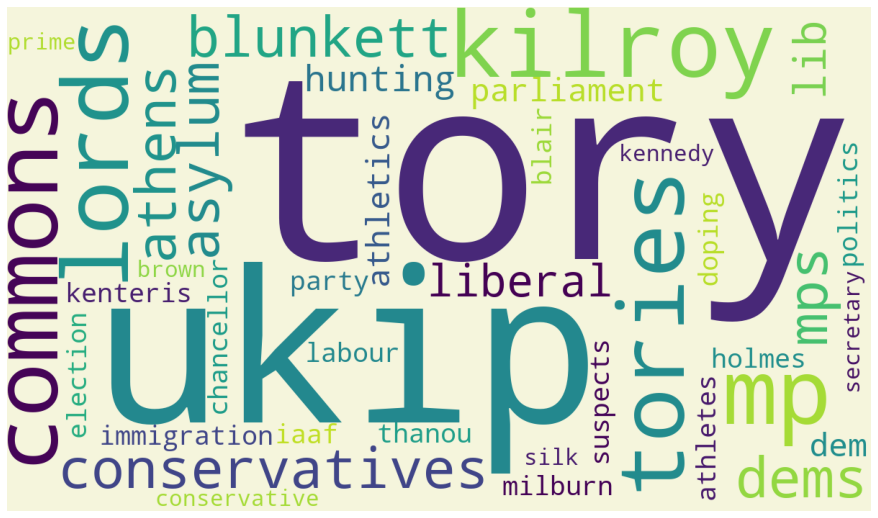

In [37]:
# plotting the WordCloud image                      
plt.figure(figsize = (12,7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### **Topic 2: Business**



In [38]:
#creating term freq dict for topic 2
t2dict = {}
for vals in docterms[docterms['Topic']==2].head(40).values:
  t2dict[vals[2]] =vals[1]
t2dict

{'shares': 0.9986977487481244,
 'profits': 0.9961604898946247,
 'deutsche': 0.9954880426149691,
 'banking': 0.9939117510446304,
 'boeing': 0.993528549942328,
 'exports': 0.993355522854953,
 'crude': 0.9927157327298246,
 'indonesia': 0.9922846384623283,
 'creditors': 0.9922840495370335,
 'shareholders': 0.9913897383224586,
 'lanka': 0.99087317345734,
 'china': 0.9907428837021478,
 'stock': 0.9905040334240761,
 'economists': 0.9903596127575927,
 'fraud': 0.9900417475895457,
 'investors': 0.9898657049087016,
 'oil': 0.9866946498370311,
 'airlines': 0.9856475193015294,
 'economist': 0.9852630770681913,
 'index': 0.9835922229555706,
 'worldcom': 0.982700924925307,
 'ebbers': 0.981740078194341,
 'blogs': 0.981736574101226,
 'takeover': 0.980388067972524,
 'blog': 0.9801766703005287,
 'currency': 0.9796264915277331,
 'airline': 0.9795880562924469,
 'fuel': 0.9792480404619252,
 'imf': 0.9790531630961117,
 'securities': 0.9778463621929745,
 '2bn': 0.9778461127743977,
 'sri': 0.9765518008745354,

In [39]:
# generating the wordcloud for topic 2
wordcloud = WordCloud(width = 1200, height = 700,
                background_color ='black',
                min_font_size = 10).generate(' '.join(list(t2dict.keys())))
wordcloud = wordcloud.generate_from_frequencies(frequencies=t2dict)


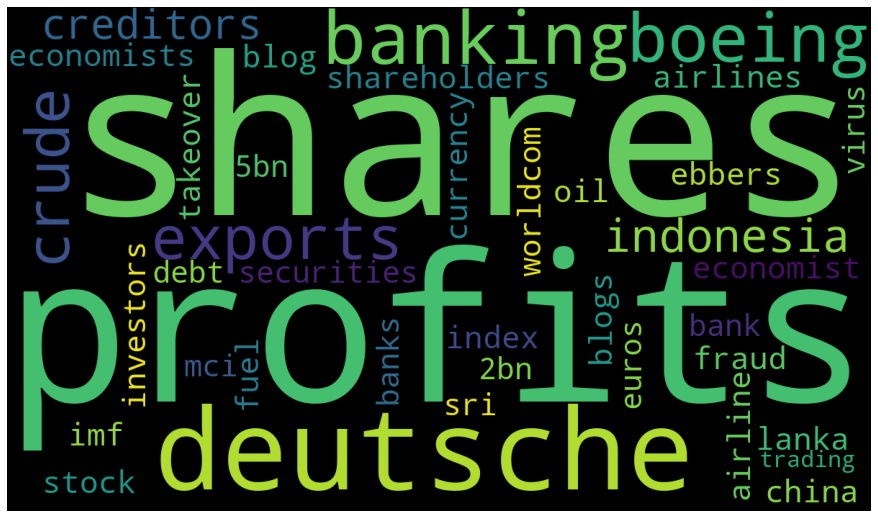

In [40]:
# plotting the WordCloud image                      
plt.figure(figsize = (12,7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### **Topic 3: Technology**

In [42]:
# creating term freq dict for topic 3
t3dict = {}
for vals in docterms[docterms['Topic']==3].head(40).values:
  t3dict[vals[2]] =vals[1]
t3dict

{'mobile': 0.9990373410895292,
 'users': 0.9978597223060878,
 'apple': 0.997564810072748,
 'pc': 0.997496211341112,
 'gaming': 0.9970673915001327,
 'broadband': 0.9966290551176457,
 'microsoft': 0.9964717150139201,
 'computer': 0.9955319895928569,
 'fiat': 0.9954887207555024,
 'phones': 0.9944566480579518,
 'piracy': 0.9942523460248014,
 'ipod': 0.9942520325399679,
 'devices': 0.9940113833679457,
 'bt': 0.9927589261434885,
 'download': 0.9902638382579917,
 'windows': 0.9899006022809335,
 'gadget': 0.989897604518534,
 'technologies': 0.9891218795878215,
 'wireless': 0.9887102239154489,
 'machines': 0.9885027005134621,
 'gadgets': 0.9882814610893942,
 'mobiles': 0.988281455539941,
 'computers': 0.9876037462326216,
 'web': 0.9861311871752245,
 'nintendo': 0.9861080544775477,
 'gm': 0.9849940297726446,
 'gamers': 0.98499083035624,
 'operators': 0.9846944564973481,
 'portable': 0.9840794870669135,
 '3g': 0.9837603308106029,
 'software': 0.9832188918823064,
 'xbox': 0.9830972849500941,
 'net

In [43]:
# generating the Wordcloud for topic 3
wordcloud = WordCloud(width = 1200, height = 700,
                background_color ='magenta',
                min_font_size = 10).generate(' '.join(list(t3dict.keys())))
wordcloud = wordcloud.generate_from_frequencies(frequencies=t3dict)


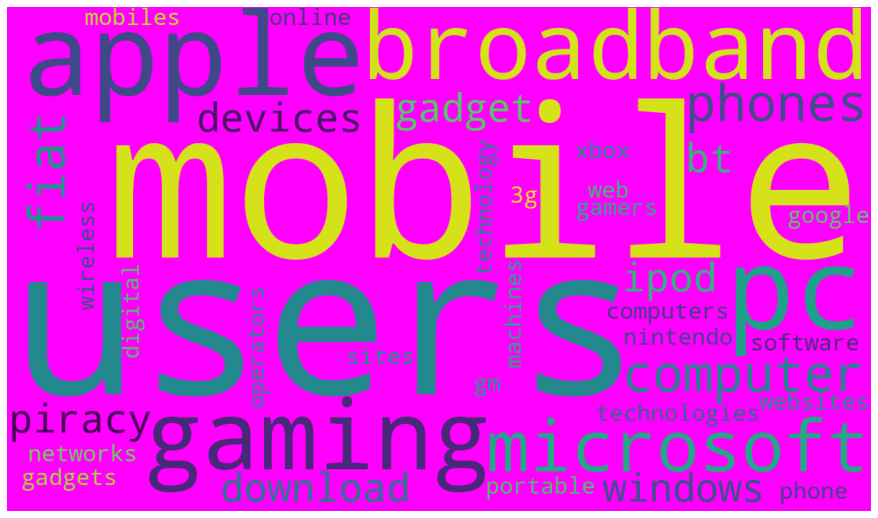

In [44]:
# plotting the WordCloud image                      
plt.figure(figsize = (12,7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### **Topic 4: Sports**

In [45]:
# creating term freq dict for topic 4
t4dict = {}
for vals in docterms[docterms['Topic']==4].head(40).values:
  t4dict[vals[2]] =vals[1]
t4dict

{'cup': 0.9989533936856759,
 'rugby': 0.9982788504462224,
 'robinson': 0.9971770714151327,
 'chelsea': 0.9969087929769846,
 'roddick': 0.9956664529947855,
 'injury': 0.9950998226960358,
 'federer': 0.9946260557733118,
 'gara': 0.9946260536910487,
 'celtic': 0.9943083784033849,
 'henman': 0.9939793204541882,
 'barcelona': 0.9932837399942432,
 'rangers': 0.9932836292092739,
 'arsenal': 0.99305772512619,
 'seed': 0.9901458609484347,
 'ferguson': 0.988851253200005,
 'gerrard': 0.9882905182073486,
 'matches': 0.9882904784357529,
 'championships': 0.9882456692647493,
 'tournament': 0.9879999254221128,
 'slam': 0.9879997660828375,
 'referee': 0.9864350524308034,
 'champions': 0.9857805825092893,
 'glazer': 0.9853959687777267,
 'tennis': 0.9853959079004455,
 'striker': 0.985030932339779,
 'ball': 0.9840491837636,
 'mourinho': 0.9838740176772344,
 'championship': 0.9838739832507731,
 'boerse': 0.9826155566231358,
 'finals': 0.9821702871912591,
 'newcastle': 0.9813045243100214,
 'nadal': 0.98123

In [46]:
# generating the wordcloud for topic 4
wordcloud = WordCloud(width = 1200, height = 700,
                background_color ='cyan',
                min_font_size = 10).generate(' '.join(list(t4dict.keys())))
wordcloud = wordcloud.generate_from_frequencies(frequencies=t4dict)


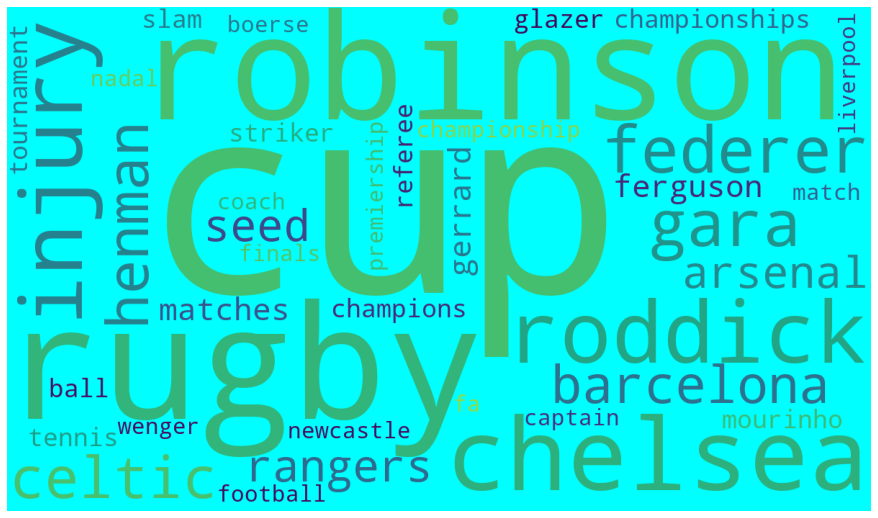

In [47]:
# plotting the WordCloud image                      
plt.figure(figsize = (12,7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### **Topic 5: Entertainment**

In [48]:
# creating term freq dict for topic 5
t5dict = {}
for vals in docterms[docterms['Topic']==5].head(40).values:
  t5dict[vals[2]] =vals[1]
t5dict

{'awards': 0.9982419621740607,
 'award': 0.996911553683738,
 'nominations': 0.9949876329461137,
 'actor': 0.9946149101539525,
 'yukos': 0.9945148670989055,
 'actress': 0.9944077863922971,
 'nominated': 0.9943954908387282,
 'singer': 0.993110780959096,
 'elvis': 0.993058903462172,
 'festival': 0.9927998565059247,
 'drake': 0.9925879782000445,
 'angels': 0.9925879641598805,
 'nominees': 0.9925879459333855,
 'oscar': 0.9921501863715029,
 'album': 0.9921427075167358,
 'theatre': 0.9921364034554913,
 'drama': 0.992136391360129,
 'aviator': 0.9918828511921743,
 'chart': 0.9907045725096878,
 'oscars': 0.9879754979719472,
 'gazprom': 0.9876186271941174,
 'starring': 0.9856826392281252,
 'comedy': 0.9836718894892367,
 'musical': 0.9832362281666435,
 'rosneft': 0.9813974998622204,
 'yugansk': 0.9808420731030523,
 'foxx': 0.9784221482284434,
 'dance': 0.9770773492074154,
 'actors': 0.973236108529889,
 'concert': 0.9732358941800543,
 'vera': 0.972370756692756,
 'song': 0.9635179119284016,
 'rock':

In [49]:
# generating the wordcloud for topic 5
wordcloud = WordCloud(width = 1200, height = 700,
                background_color ='maroon',
                min_font_size = 10).generate(' '.join(list(t5dict.keys())))
wordcloud = wordcloud.generate_from_frequencies(frequencies=t5dict)


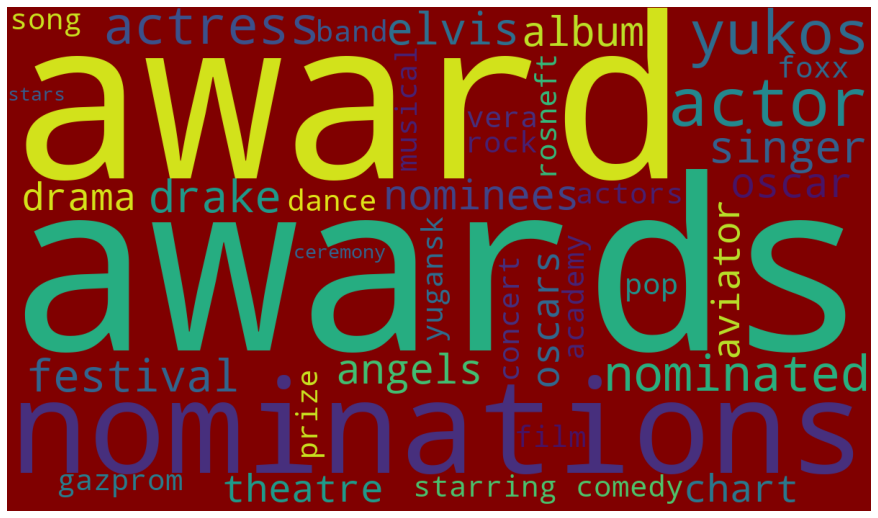

In [50]:
# plotting the WordCloud image                      
plt.figure(figsize = (12,7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

## **Conclusions**

1. While reading the text files, we noticed that the file encoding was different in a few off-cases. We found that considering such factors, and engineering based on such knowledge, is very important while handling such data, in order to do so efficiently.

2. Upon experimenting with stemming and lemmatization on our dataset, we found that although it saves space and perhaps time, in our case, it's better to focus on quality, and avoid nuances. In our own 'cost-benefit' analysis, the difference weren't all that significant. Perhaps at a massive scale, the former approach would be ideal.

3. We noticed that it's more optimal to tokenize with no factual differences. 
so we lowercased the contents to unify tokens that may have just case-differences.

4. These are the optimal lda metrics that we got after implementing GridSearchCV: 

  Best LDA model's params {'n_components': 5}

  Best log likelihood Score for the LDA model -643494.9704171557

  LDA model Perplexity on train data 1696.6352006244963

5. Upon looking at the top n topics generated, we were able to correlate it with relevance to what was expected at a significant degree, whilst also shedding light on some unseen aspects.. Hence, we see that the model effectively beared fruit. 

*At the end a word of Thankyou to you for going through our project till the very end, we appreciate your time. Happy Learning...!*